# Line data analysis

---

Data is collected from 8 group chat in line
Downloaded into a txt format provided by the application
The overall process of the data is:
- Initialize spark
- Clean up data
- Analyze

In [1]:
#Necessary for pointing to correct python path
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

Multiple Chats are compiled into 1 txt file

In [2]:
from glob import glob
dataTXTName = glob("data/*")
compiledName = "compiled.txt"

with open(compiledName,"w", encoding="utf8") as f:
    for currFilePath in dataTXTName:
        with open(currFilePath, encoding="utf8") as f2:
            for line in f2:
                f.write(line)

In [3]:
#Initialize Spark
import pyspark as ps

spark = ps.sql.SparkSession.builder.master('local[4]').appName('Line Analyser').getOrCreate()

sc = spark.sparkContext

In [4]:
import findspark

findspark.init()

# Pre-processing text

---

In [81]:
#Use 2 stopwords and a custom word list

import regex as re
from nltk.corpus import stopwords
import nltk
import string

In [82]:
stopwords_ind = set(nltk.corpus.stopwords.words('indonesian'))
stopwords_eng = set(nltk.corpus.stopwords.words('english'))

In [83]:
words_remove = ['ya', 'gk', 'g', '-', 
                'yg', 's.', 'f', '|',
                '-----', 'ga', 'gue',
                'yaa', 'gw', ':', '(color)'
              ]

In [103]:
def is_stopwords(text):
    if text not in stopwords_ind and text not in stopwords_eng \
    and text not in words_remove and text not in string.punctuation:
        return text

In [115]:
rdd = sc.textFile(compiledName)\
    .flatMap(lambda x: x.split()).map(lambda x: x.lower()).map(lambda x: is_stopwords(x))

In [116]:
text_list = rdd.collect()

In [117]:
text_list

[['Thu,', '14/10/2021'],
 [],
 ['Fri,', '15/10/2021'],
 ['10:27',
  'SiePend',
  'FKUI',
  '2018',
  '[DEADLINE',
  'ISI',
  'PROGRESS',
  'RISET',
  '❗️❗️]'],
 [],
 ['Jangan',
  'lupaaa',
  'ya',
  'isi',
  'progress',
  'risettt',
  'kamuuu',
  'dan',
  'cek',
  'info',
  'lainnya🌼🌼🌼🌼'],
 [],
 ['⬇️⬇️⬇️⬇️⬇️⬇️'],
 [],
 ['📌Isi',
  'form',
  'progress',
  'riset',
  'bit.ly/Riset18',
  'DAN',
  'https://forms.gle/jDXapHKBEWRg2Jij8',
  '(WAJIB',
  'dari',
  'modul',
  'riset)'],
 ['*MAX', 'hari', 'Jumat,', '15', 'Oktober', 'pkl.', '12.00*'],
 [],
 ['📌Kasih', 'tahu', 'kamu', 'sidangnya', 'kapan', 'di:', 'bit.ly/Sidang18'],
 [],
 ['📌Drive',
  'riset',
  '(di',
  'situ',
  'ada:',
  'template',
  'proposal,',
  'template',
  'skripsi,',
  'ALUR',
  'DAN',
  'BERKAS',
  'PENGAJUAN',
  'ETIK',
  'KE',
  'KOMITE',
  'ETIK',
  'FKUI,',
  'alur',
  'pendaftaran',
  'sidang,',
  'dll):',
  'bit.ly/DriveRiset18'],
 [],
 ['📌Q&A',
  'dan',
  'Kumpulan',
  'Informasi',
  'tentang',
  'riset',
  '(Moho

In [ ]:
text_list_cleaned = [x for x in text_list if x]
print(len(text_list_cleaned))

# Analyze

In [100]:
#Analyze using spark, count occurance of the words
rdd_txt_cl = sc.parallelize(text_list_cleaned).map(lambda word: (word,1))\
.reduceByKey(lambda x, y: x + y)\
.sortBy(lambda amount: amount[1], ascending=False)

In [101]:
text_freq = rdd_txt_cl.collect()

In [102]:
text_freq_dict = {
    'text':[],
    'freq':[]
}

In [92]:
for i in text_freq:
    text_freq_dict['text'].append(i[0])
    text_freq_dict['freq'].append(i[1])

In [93]:
import pandas as pd

In [94]:
df = pd.DataFrame.from_dict(text_freq_dict, orient='columns')

In [95]:
df

,text,freq
0,dyah,2330
1,intan,2252
2,[photo],1901
3,fkui,1841
4,reynardi,1372
...,...,...
37945,menempuh,1
37946,intan!!!,1
37947,ultaaaaah,1
37948,velliaa,1


In [96]:
df2 = df.head(15)

<AxesSubplot:title={'center':'Top 15 Text'}, xlabel='text'>

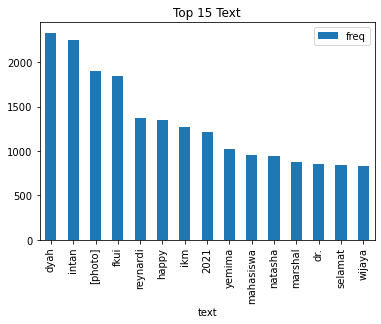

In [97]:
df2.plot.bar(x='text', y='freq', title='Top 15 Text', legend = True, )

As we can observe from initial analysis of the line dataset obtained from 8 different text data.
The total amount of words (post-process) is : 306171
The most recurring word: Dyah
Intan Dyah, Reynardi and Yemima whom are students had the most reccuring words in those different text data
Suprisingly, "Happy" appears in one of the most occuring word